In [1]:
import sys
import os
from glob import glob

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("ECCOv4-py")
import ecco_v4_py as ecco
from ecco_download import *

from basin_masks import get_basin_solodoch

In [2]:
geom_fp = 'ECCO_L4_GEOMETRY_LLC0090GRID_V4R4/GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc'
xds_geom = xr.open_dataset(geom_fp)

all_three_basins = get_basin_solodoch('indo-pacific', geom_fp) + (2 * get_basin_solodoch('southern', geom_fp)) + (3 * get_basin_solodoch('atlantic', geom_fp))

get_basin_name:  ['pac', 'atl', 'ind', 'arct', 'bering', 'southChina', 'mexico', 'okhotsk', 'hudson', 'med', 'java', 'north', 'japan', 'timor', 'eastChina', 'red', 'gulf', 'baffin', 'gin', 'barents'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
shape after reading 
(13, 90, 90)
get_basin_name:  ['med'] /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data
load_binary_array: loading file /Users/emiliolr/Desktop/GTC-OTP/ECCOv4-py/binary_data/basins.data
load_binary_array: data array shape  (1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: d

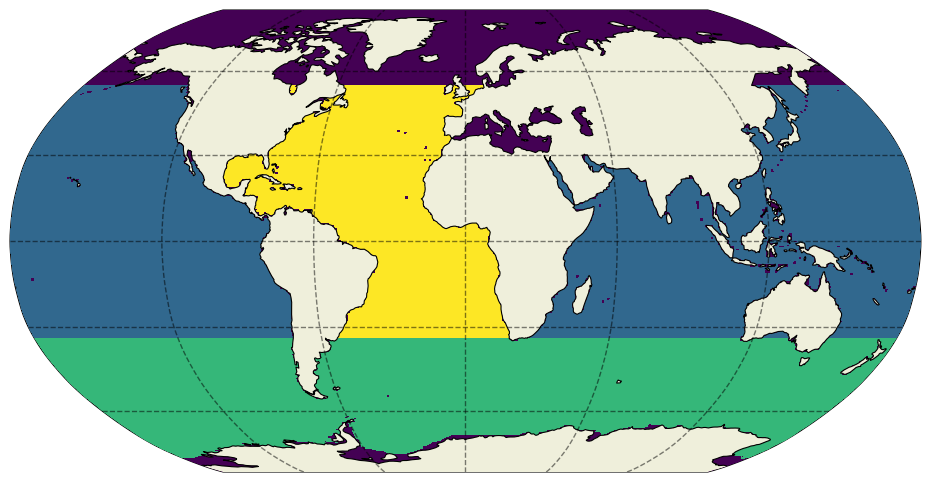

In [3]:
# Plotting the extracted ocean basins as a sanity check against Solodoch et al. (2023)
plt.figure(figsize = (12, 6))
ecco.plot_proj_to_latlon_grid(xds_geom.XC, xds_geom.YC, all_three_basins,
                              projection_type = 'robin', cmap = 'viridis', 
                              user_lon_0 = 0, show_colorbar = False);